In [1]:
import pandas as pd
import gc
from google.colab import drive
drive.mount('/content/drive')

data_root = '/content/drive/MyDrive/부트캠프/'
data_path = data_root + '11_파이널/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# 폰트 파일 경로 지정
font_path = '/content/drive/MyDrive/utils/NanumGothic.ttf'

# 폰트 등록 및 matplotlib 설정
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)

In [12]:
# df31 = pd.read_parquet(data_path + 'train/3.승인매출정보/201807_train_승인매출정보.parquet')
# df32 = pd.read_parquet(data_path + 'train/3.승인매출정보/201808_train_승인매출정보.parquet')
# df33 = pd.read_parquet(data_path + 'train/3.승인매출정보/201809_train_승인매출정보.parquet')
# df34 = pd.read_parquet(data_path + 'train/3.승인매출정보/201810_train_승인매출정보.parquet')
df35 = pd.read_parquet(data_path + 'train/3.승인매출정보/201811_train_승인매출정보.parquet')
df36 = pd.read_parquet(data_path + 'train/3.승인매출정보/201812_train_승인매출정보.parquet')

In [17]:
df31 = pd.read_parquet(data_path + 'test/3.승인매출정보/201807_test_승인매출정보.parquet')
df32 = pd.read_parquet(data_path + 'test/3.승인매출정보/201808_test_승인매출정보.parquet')
df33 = pd.read_parquet(data_path + 'test/3.승인매출정보/201809_test_승인매출정보.parquet')
df34 = pd.read_parquet(data_path + 'test/3.승인매출정보/201810_test_승인매출정보.parquet')
df35 = pd.read_parquet(data_path + 'test/3.승인매출정보/201811_test_승인매출정보.parquet')
df36 = pd.read_parquet(data_path + 'test/3.승인매출정보/201812_test_승인매출정보.parquet')

In [18]:
df3 = pd.concat([df31, df32, df33, df34, df35, df36])
del df31
del df32
del df33
del df34
del df35
del df36
gc.collect()

0

In [19]:
col_to_drop = [3,4,5,6,7,8,2, 9, 10, 37, 38, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,225,262,263,270,377,378,379,380,280,281,282,283,294,295,296,297,371,372]
df3.drop(columns=df3.columns[col_to_drop], inplace=True, axis=1)

In [ ]:
d3 = df3.describe()
d3m = d3.loc['min', :]
print(d3m.sort_values(ascending=False))
d3m = d3.loc['max', :]
print(d3m.sort_values(ascending=False))

기준년월              201807.0
RP후경과월_건강              6.0
RP후경과월_유선방송            6.0
최종카드론_금융상환방식코드         2.0
이용금액_오프라인_R6M          0.0
                    ...   
증감_RP건수_전월            -4.0
이용금액_체크_R12M        -414.0
이용금액_체크_B0M        -1380.0
이용금액_일시불_B0M       -2754.0
이용금액_일시불_R12M      -4501.0
Name: min, Length: 283, dtype: float64
카드론이용금액_누적         1903389.0
이용금액_CA_R12M        960000.0
이용금액_일시불_R12M       937176.0
이용금액_오프라인_R6M       800949.0
최대이용금액_일시불_R12M     432358.0
                     ...    
이용금액_당사기타_B0M            0.0
이용금액_당사기타_R3M            0.0
승인거절건수_입력오류_B0M          0.0
승인거절건수_기타_B0M            0.0
승인거절건수_입력오류_R3M          0.0
Name: max, Length: 283, dtype: float64


In [20]:
df3[df3.select_dtypes(include='int64').columns] = df3.select_dtypes(include='int64').astype('int32')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600000 entries, 0 to 99999
Columns: 301 entries, 기준년월 to 이용금액대
dtypes: float64(2), int32(281), object(18)
memory usage: 739.3+ MB


In [21]:
df3.to_parquet(data_path + 'processed/df3_0.parquet')

In [22]:
df12 = pd.read_parquet(data_path + 'processed/df3_12.parquet')
df34 = pd.read_parquet(data_path + 'processed/df3_34.parquet')
df56 = pd.read_parquet(data_path + 'processed/df3_56.parquet')
df0 = pd.read_parquet(data_path + 'processed/df3_0.parquet')
df3 = pd.concat([df12, df34, df56, df0])
del df12
del df34
del df56
del df0

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000000 entries, 0 to 99999
Columns: 301 entries, 기준년월 to 이용금액대
dtypes: float64(2), int32(281), object(18)
memory usage: 3.6+ GB


In [12]:
df3.to_parquet(data_path + 'processed/df3.parquet', index=False)
gc.collect()

5588

In [25]:
nasorts = df3.isna().sum().sort_values(ascending=False).head(17)

In [6]:
nasorts

,0
_3순위여유업종,2972290
_3순위납부업종,2888898
_2순위여유업종,2878107
_3순위교통업종,2556184
_2순위납부업종,2543911
_1순위여유업종,2485573
최종카드론_신청경로코드,2448009
최종카드론_금융상환방식코드,2447897
_2순위교통업종,2071153
_3순위쇼핑업종,1643222


In [8]:
nasorts.index

Index(['_3순위여유업종', '_3순위납부업종', '_2순위여유업종', '_3순위교통업종', '_2순위납부업종', '_1순위여유업종',
       '최종카드론_신청경로코드', '최종카드론_금융상환방식코드', '_2순위교통업종', '_3순위쇼핑업종', '_1순위납부업종',
       '_1순위교통업종', '_2순위쇼핑업종', '_3순위업종', '_1순위쇼핑업종', '_2순위업종', '_1순위업종'],
      dtype='object')

In [26]:
df3.drop(columns=nasorts.index, inplace=True, axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000000 entries, 0 to 99999
Columns: 284 entries, 기준년월 to 이용금액대
dtypes: float64(1), int32(281), object(2)
memory usage: 3.2+ GB


In [2]:
df3 = pd.read_parquet(data_path + 'processed/df3.parquet')

In [3]:
d3 = df3.describe()
d3m = d3.loc['min', :]
d3x = d3.loc['max', :]

In [5]:
d3m = d3m - d3x
d3m = d3m.sort_values(ascending=False)
d3m.head()

,0
할부금액_부분_3M_R12M,0.0
RP건수_건강_B0M,0.0
할부건수_부분_14M_R12M,0.0
할부건수_부분_3M_R12M,0.0
증감_RP건수_유선방송_전월,0.0


In [8]:
mmi =  d3m.head(29).index
mmi

Index(['할부금액_부분_3M_R12M', 'RP건수_건강_B0M', '할부건수_부분_14M_R12M', '할부건수_부분_3M_R12M',
       '증감_RP건수_유선방송_전월', '납부_건강연금이용금액', '납부_렌탈료이용금액', '이용금액_당사페이_B0M',
       '납부_유선방송이용금액', '증감_RP건수_건강_전월', '이용금액_당사기타_R6M', '이용금액_부분무이자_B0M',
       '이용금액_당사페이_R6M', '이용금액_당사기타_R3M', '이용건수_당사페이_R6M', '이용건수_당사페이_R3M',
       '이용금액_당사기타_B0M', '이용건수_부분무이자_B0M', '이용금액_당사페이_R3M', '여유_여행이용금액',
       '이용건수_당사기타_B0M', '이용건수_당사기타_R3M', '이용건수_당사기타_R6M', '이용건수_당사페이_B0M',
       '승인거절건수_입력오류_B0M', '승인거절건수_기타_B0M', '이용개월수_당사페이_R6M', '할부건수_부분_6M_R12M',
       'RP건수_유선방송_B0M'],
      dtype='object')

In [9]:
for m in mmi:
    print(m, len(df3[m].unique()))

할부금액_부분_3M_R12M 1
RP건수_건강_B0M 1
할부건수_부분_14M_R12M 1
할부건수_부분_3M_R12M 1
증감_RP건수_유선방송_전월 1
납부_건강연금이용금액 1
납부_렌탈료이용금액 1
이용금액_당사페이_B0M 1
납부_유선방송이용금액 1
증감_RP건수_건강_전월 1
이용금액_당사기타_R6M 1
이용금액_부분무이자_B0M 1
이용금액_당사페이_R6M 1
이용금액_당사기타_R3M 1
이용건수_당사페이_R6M 1
이용건수_당사페이_R3M 1
이용금액_당사기타_B0M 1
이용건수_부분무이자_B0M 1
이용금액_당사페이_R3M 1
여유_여행이용금액 1
이용건수_당사기타_B0M 1
이용건수_당사기타_R3M 1
이용건수_당사기타_R6M 1
이용건수_당사페이_B0M 1
승인거절건수_입력오류_B0M 1
승인거절건수_기타_B0M 1
이용개월수_당사페이_R6M 1
할부건수_부분_6M_R12M 1
RP건수_유선방송_B0M 1


In [10]:
df3.drop(columns=mmi, inplace=True, axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Columns: 255 entries, 기준년월 to 이용금액대
dtypes: float64(1), int32(252), object(2)
memory usage: 2.9+ GB


In [11]:
del d3m
del d3x
del mmi
gc.collect()

11802

In [13]:
y = pd.read_csv(data_path + 'processed/segment.csv')
y

,ID,Segment
0,TRAIN_000000,D
1,TRAIN_000001,E
2,TRAIN_000002,C
3,TRAIN_000003,D
4,TRAIN_000004,E
...,...,...
2399995,TRAIN_399995,E
2399996,TRAIN_399996,D
2399997,TRAIN_399997,C
2399998,TRAIN_399998,E


In [14]:
dm = pd.get_dummies(y['Segment'])
y_train = y['Segment'].iloc[:2400000]

In [25]:
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [150]:
i = 31
c = df3.columns[i]
d = df3.iloc[:,i]
# dmc = pd.concat([d,dm], axis=1)
c

'이용금액_카드론_R12M'

 - index: 8, column: 이용건수_카드론_B0M - 값이 1인 열이 너무 적음
 - index: 15, column: 이용금액_카드론_B0M - 유의미한 값이 너무 적음
 - index: 20, column: 이용건수_부분무이자_R12M - 값이 다른 열이 너무 적음
 - index: 28, column: 이용금액_부분무이자_R12M - 유의미한 값이 너무 적음

In [151]:
len(d.unique())

15443

In [143]:
d.value_counts()

,count
이용금액_부분무이자_R12M,
0,2940494
7976,75
7815,68
7820,66
8037,65
...,...
9731,1
18378,1
9527,1


In [153]:
d_train = d.iloc[:2400000]
# d_train과 y['Segment'] 수직병합
d_train = pd.merge(d_train, y_train, left_index=True, right_index=True)

In [152]:
train_d = d.iloc[:2400000]
train_d = pd.merge(train_d, dm, left_index=True, right_index=True)
train_d.corr()[c]

,이용금액_카드론_R12M
이용금액_카드론_R12M,1.000000
A,0.005400
B,0.002522
C,0.018195
D,0.036660
E,-0.042912


In [121]:
pd.crosstab(d_train[c], d_train['Segment']) #, normalize='columns')

Segment,A,B,C,D,E
이용건수_카드론_R12M,,,,,
0,867,120,117016,321254,1830866
1,12,9,4316,11810,47257
2,92,15,6044,15414,42413
3,1,0,214,764,1516


In [122]:
table = pd.crosstab(d_train[c], d_train['Segment'])
chi2, p, dof, expected = chi2_contingency(table, lambda_="log-likelihood", correction=False)

print(f"Chi2: {chi2}, p-value: {p}")
print(f"expected < 5: {(expected < 5)}")

Chi2: 8870.41726062428, p-value: 0.0
expected < 5: [[False False False False False]
 [False  True False False False]
 [False  True False False False]
 [ True  True False False False]]


KeyboardInterrupt: 

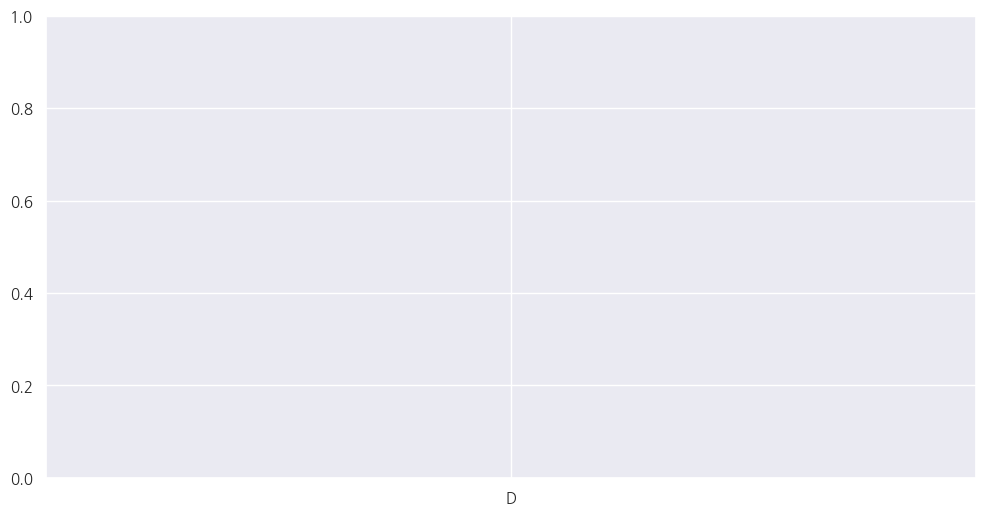

In [74]:
sns.histplot(d_train, x='Segment', hue=c, multiple='dodge', stat='probability')

<Axes: xlabel='이용금액_카드론_R12M', ylabel='Density'>

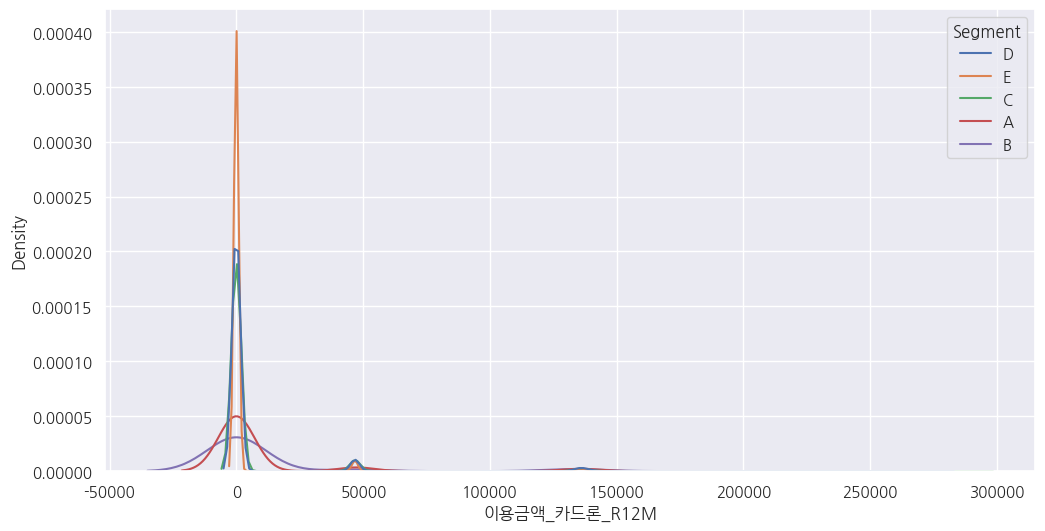

In [154]:
sns.kdeplot(d_train, x=c, hue='Segment', common_norm=False)

In [20]:
sample = d.sample(5000, random_state=42)
stat, p = shapiro(sample)
print(f"Shapiro-Wilk p-value: {p}")

Shapiro-Wilk p-value: 2.8990889537734e-63


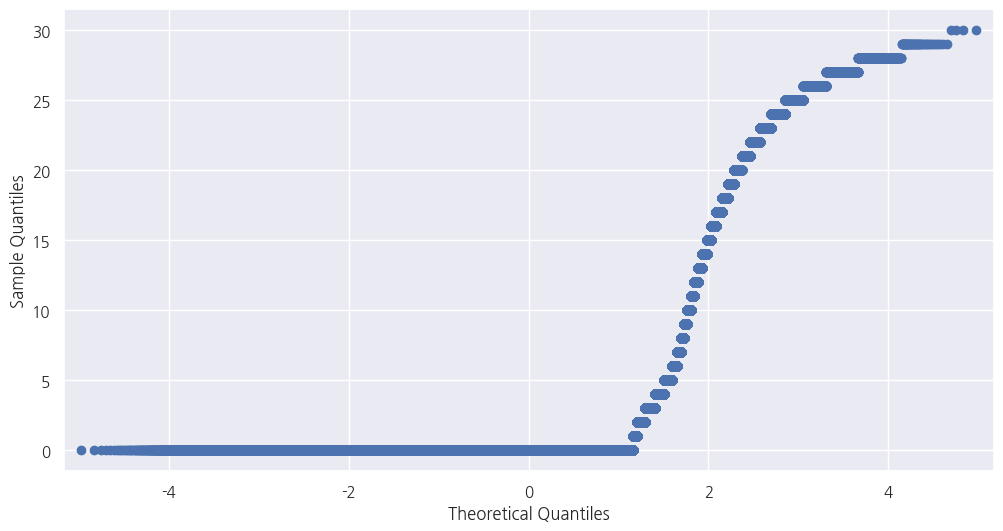

In [31]:
sm.qqplot(data=d)
plt.show()